In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#Load Dataset
df=pd.read_csv(r"C:\Users\sarth\Desktop\Datasets\sales_data_sample.csv",encoding="unicode_escape")
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 5327: invalid start byte

In [8]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [12]:
#Select only numerical columns for k-means-clustering
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
51,10391,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,...,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small


In [16]:
X=df[['QUANTITYORDERED','PRICEEACH','SALES']]
X

,QUANTITYORDERED,PRICEEACH,SALES
10,37,100.00,3965.66
21,20,72.55,1451.00
40,21,100.00,4905.39
47,30,100.00,3944.70
51,24,100.00,2416.56
...,...,...,...
2667,43,76.00,3268.00
2673,26,67.20,1747.20
2685,44,100.00,5001.92
2764,35,100.00,4277.35


In [14]:
#Scaling 
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [17]:
x_scaled=sc.fit_transform(X)

In [18]:
x_scaled

array([[ 3.10448270e-01,  7.99888613e-01,  3.03513655e-01],
       [-1.44081635e+00, -5.84415234e-01, -1.16521367e+00],
       [-1.33780078e+00,  7.99888613e-01,  8.52377968e-01],
       [-4.10660691e-01,  7.99888613e-01,  2.91271633e-01],
       [-1.02875409e+00,  7.99888613e-01, -6.01262937e-01],
       [-5.13676257e-01,  6.15314767e-01, -3.80894847e-01],
       [ 1.34060393e+00,  7.99888613e-01,  1.15434007e+00],
       [-8.22722955e-01, -1.66361751e+00, -1.23594406e+00],
       [ 1.23758836e+00,  7.99888613e-01,  3.39859604e+00],
       [ 1.54663506e+00,  7.99888613e-01,  3.69598491e+00],
       [-2.04629559e-01,  7.99888613e-01,  5.00005129e-01],
       [-7.19707389e-01,  7.99888613e-01,  5.73550715e-01],
       [ 1.04417138e-01, -9.33390922e-01, -6.71064661e-01],
       [ 3.10448270e-01, -1.87794506e+00, -9.99163719e-01],
       [-4.10660691e-01,  7.99888613e-01,  9.19259363e-01],
       [-6.16691823e-01,  7.99888613e-01,  3.78893209e-01],
       [-5.13676257e-01,  7.99888613e-01

In [19]:
#Kmeans clustering 
from sklearn.cluster import KMeans

In [21]:
#inertia stores all the values of SumofSquaredError
inertia=[]
K=range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

    


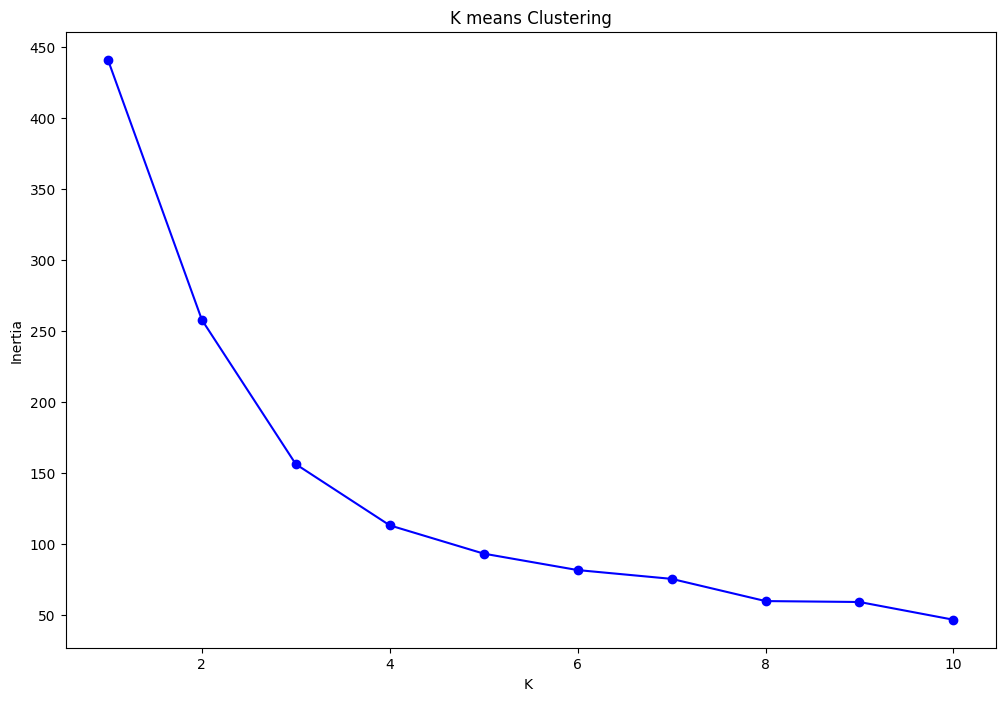

In [24]:
#plotting 
plt.figure(figsize=(12,8))
plt.plot(K,inertia,'bo-')
plt.xlabel('K ')
plt.ylabel('Inertia')
plt.title('K means Clustering')
plt.show()

In [26]:
#optimal k value=4
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k)
df['Clusters']=kmeans.fit_predict(x_scaled)
df[['QUANTITYORDERED','PRICEEACH','SALES','Clusters']]

C:\Users\sarth\AppData\Local\Temp\ipykernel_11864\4105690333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters']=kmeans.fit_predict(x_scaled)


,QUANTITYORDERED,PRICEEACH,SALES,Clusters
10,37,100.00,3965.66,0
21,20,72.55,1451.00,3
40,21,100.00,4905.39,0
47,30,100.00,3944.70,0
51,24,100.00,2416.56,0
...,...,...,...,...
2667,43,76.00,3268.00,2
2673,26,67.20,1747.20,3
2685,44,100.00,5001.92,1
2764,35,100.00,4277.35,0
